# Colab でグラフを描画する
（第2回講義資料と一部重複）Python には [`matplotlib`](https://matplotlib.org) という極めて高機能なグラフ描画モジュール・ライブラリが用意されている．マニュアルが膨大なので，全てを読みこもうとするよりも，使いながら馴れていくのがいいと思う（何年目か忘れたが長江もまだ馴れてる途中）．

まずは，慣例に従って，グラフ描画モジュール[`matplotlib.pyplot`]((https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)を`plt`という名前でインポートしよう．

In [1]:
from matplotlib import pyplot as plt

プロットするデータとしては，
[2020年の仙台市の気象データ](https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s1.php?prec_no=34&block_no=47590&year=2020&month=&day=&view=)から抜き出した各月の平均気温と総降水量を使う（課題では**指示された年のデータ**を使用すること）：

|| 1月 |2月|3月|4月|5月|6月|7月|9月|9月|10月|11月|12月|
|---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|平均気温（℃）| 4.0 | 4.4 | 7.5 | 10.1 | 16.8 | 21.2 | 21.3 | 26.6 | 22.5 | 15.6 | 10.8 | 3.9 |
|総降水量（mm）|126.5 | 19.5 | 45.5 | 153.5 | 105.5 | 43.5 | 397.5 | 72.5 | 191.5 | 63.0 | 7.0 | 21.5

まずは，これらの月，気温および降水量を，それぞれ，`month`, `temp` および `prec` という**変数**に格納する．

月については，`1, 2, ..., 12` といちいち入力するのは面倒なので，[`range`関数](https://docs.python.org/3/library/stdtypes.html#range)を使ってみる．
```python
range(start, stop)
```
とすると，$\mathtt{start} \leq a_{i} < \mathtt{stop}, a_{i+1}=a_{i}+1$ であるような数列 $a_{1}, a_{2}, ...$ を生成する．

In [2]:
#
# month， temp, prep の3つの変数に，それぞれ「1〜12までの数値」，「気温」および「降水量」を代入する
#
month = range(1,13) # 1から12までの整数列を作成
temp = [4.0, 4.4, 7.5, 10.1, 16.8, 21.2, 21.3, 26.6, 22.5, 15.6, 10.8, 3.9] # 気温
prec = [126.5, 19.5, 45.5, 153.5, 105.5, 43.5, 397.5, 72.5, 191.5, 63.0, 7.0, 21.5] # 降水量

# 折れ線グラフ

[`pyplot.plot`関数](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)を用いれば，折れ線グラフを描画できる．基本的な書式は以下の2つ：
```python
plot(y) # y軸の値のみを与えて折れ線グラフを描画（x軸の値は0から始まる順列を自動的に生成）
plot(x, y) # x軸とy軸の値を与えて折れ線グラフを描画
```

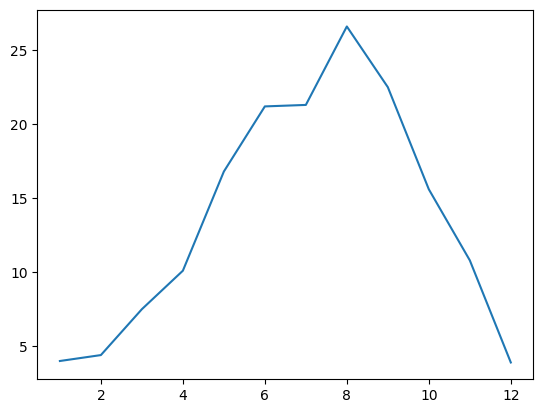

In [3]:
# 平均気温を折れ線グラフで描画
plt.plot(month, temp) # `plot`関数を用いて各月の平均気温をプロット
plt.show() # グラフの描画

## グラフのスタイル


`plot`関数の第3引数に適切な**文字列**を与えることで，グラフのスタイルを変更できる．文字列の書式は
```str
'[色][線種][印]'
```
の任意の組み合わせ．例えば，下記のような感じ．
- `'ro'` : 赤(`r`)の丸印(`o`)．線なし．
- `'b--'` : 青(`b`)で破線(`--`)．印なし．
- `'g:*'`: 緑(`g`)で点線(`:`)と星印(`*`)の組み合わせ．

それぞれに指定できる要素は下記の通り：

| 要素 | 指定可能な値|
| --- | --- |
| 色 | `'b'`, `'g'`, `'r'`, `'c'`, `'m'`, `'y'`, `'k'`, `'w'` |
| 線種 | `-`, `--`, `-.`, `:` |
| 印 | `o`, `.`, `,`, `+`, `x`, `*`, `h`, `d` など|

なお，Python では，文字列はダブルクォート（`"`）もしくはシングルクォート（`'`）で囲むルールになっている．Colab を使っていると，セル内の文字列が下記のように色つきで表示されるので判りやすい．
```python
"ro" # 文字列
'b--' # 文字列
g:* # クォートで囲んでいない，ただの記号の羅列
```

次のセルを実行すると，気温のグラフが「緑」「点線」「星印」でプロットされる．


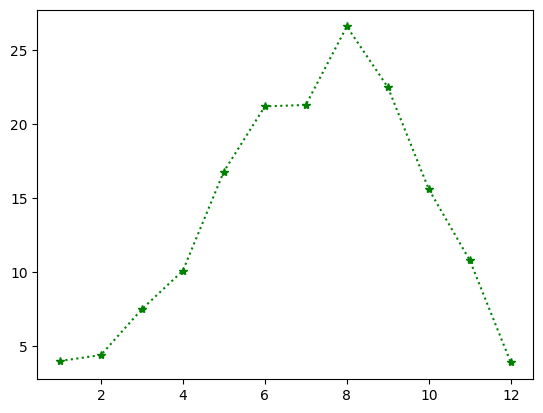

In [4]:
plt.plot(month, temp, "g:*") 
plt.show() # グラフの描画

`color`引数や`linewidth`引数を使えば，もう少し細かく色を指定したり線の太さを変えたりできる．
```python
plot(x, y, color=色指定文字列, linewidth=線の太さ)
```
色指定文字列については，次のセクションを参照のこと．オプション引数の順序はこの通りでなくてもよいし，`color`もしくは`linewidth`のいずれか一方のみを指定することもできる．

これ以外にも，透過を指定する`alpha`や重なりの順番を与える `zorder` など，様々な引数のオプションが用意されている．詳細は[マニュアル](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)を参照のこと．

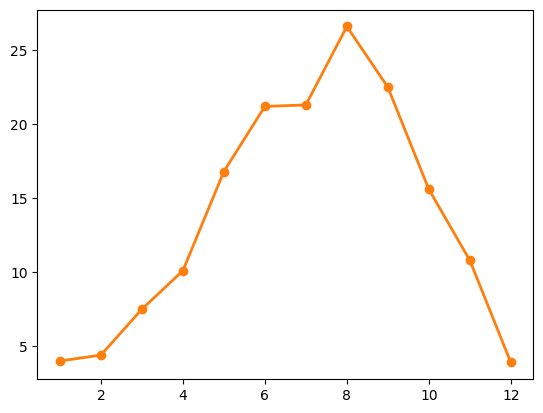

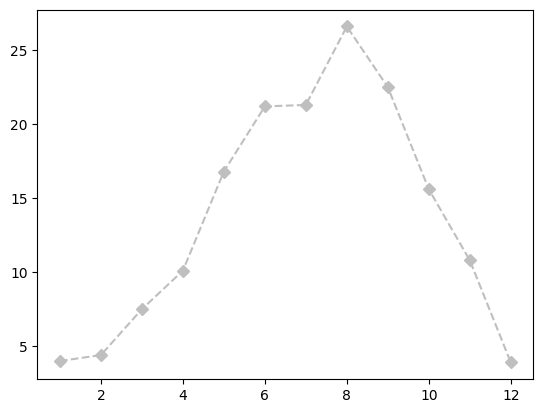

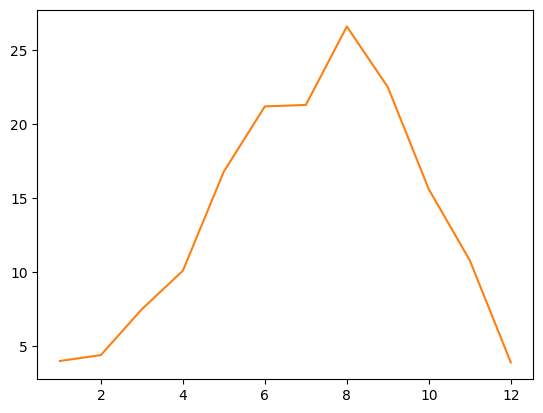

In [5]:
# グラフの色や線の太さを指定
plt.plot(month, temp, '-o', color="tab:orange", linewidth=2) # 色と線の太さを指定
plt.show()
plt.plot(month, temp, '--D', color="0.75") # グレースケール階調を指定
plt.show()
plt.plot(month, temp, "C1") # "C1" は "tab:orange" と同じ
plt.show()

# 色指定文字列
`color`に与える色指定文字列には，例えば，以下のようなものがある．**こだわりだすとキリが無い**ので，ほどほどに．
- 色指定文字列として`"0.1"`のように0以上1以下の数値を与えると，グレースケールの階調を指定できる（学術論文などに便利）．数値が大きいほど白っぽく，小さいほど黒っぽくなる．
- 簡単な色名として，以下が用意されている．なお，Tableau Paletteの色には，それぞれ，`"C0", "C1", "C2", ..., "C9"`という別名がついている．  
![](https://matplotlib.org/3.1.1/_images/sphx_glr_named_colors_001.png)
![](https://matplotlib.org/3.1.1/_images/sphx_glr_named_colors_002.png)
- [CSS Colors](https://matplotlib.org/3.1.1/_images/sphx_glr_named_colors_003.png) にはもっと多くの色がリストされている．
- `(0.2, 0.5, 0.3)`という数値や`"#1BFF23"`のような16進数でRGB色指定することもできる．


## ラベル
`plot`関数に`label`引数を与えると，描画したデータのラベルを指定できる．与えたラベルは，後で[`pyplot.legend`関数](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)などで参照できる．次のセルを実行すると，気温のグラフに `"temperature"` というラベルをつけられる．

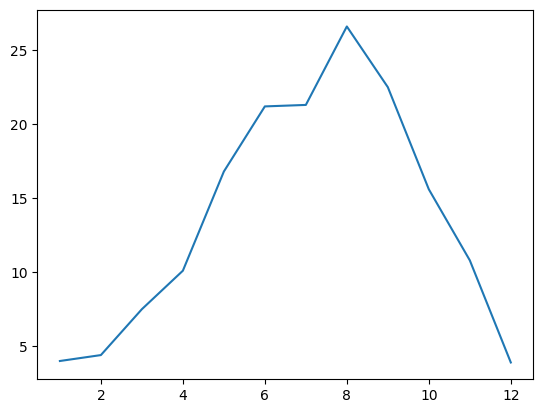

In [6]:
plt.plot(month, temp, label="temperature") # label引数を与えて各月の気温を描画
plt.show() # グラフの描画

# グラフのカスタマイズ
`matplotlib.pyplot` モジュールには，グラフを細かくカスタマイズする沢山の関数が用意されている．ここでは，その一部を紹介しておこう．
- [`xticks`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html), [`yticks`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html) : x/y軸上の刻み
- [`xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html), [`ylabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html) : x/y軸のラベル
- [`xlim`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html), [`ylim`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html) : x/y軸の表示範囲
- [`title`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html) : グラフの表題
- [`legend`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html) : 凡例

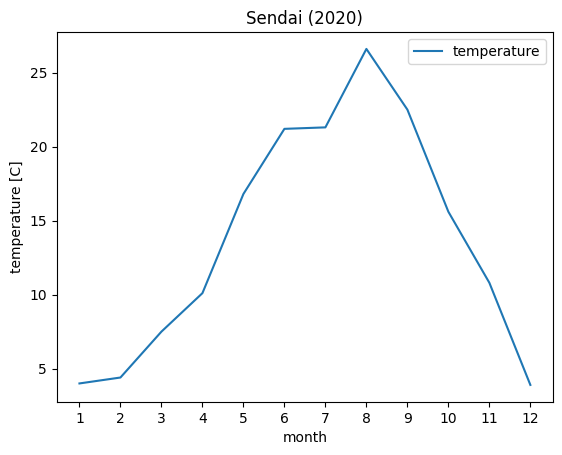

In [7]:
plt.plot(month, temp, label="temperature") # `plot`関数を用いて各月の平均気温をプロット
plt.xticks(month) # x軸の目盛りを月単位にする
plt.xlabel("month") # x軸ラベル
plt.ylabel("temperature [C]") # y軸ラベル
plt.title("Sendai (2020)") # グラフ表題
plt.legend() # 凡例の表示
plt.show() # グラフの描画

# 棒グラフ

[`bar`関数](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)を使えば，棒グラフがプロットできる．`bar`関数の基本的な書式は下記のとおり．`plot`関数とは違い，x軸を省略できない点に注意しよう．
```python
bar(x, y) # x軸とy軸の値を与えて棒グラフを描画
```

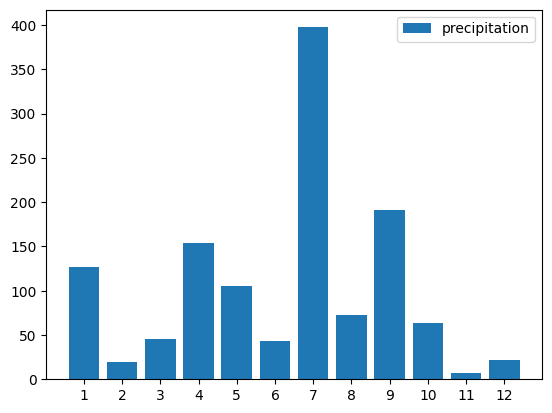

In [8]:
plt.bar(month, prec, label="precipitation") # 降水量を棒グラフでプロット
plt.xticks(month) # x軸の目盛りを月単位にする
plt.legend() # 凡例の表示
plt.show() # グラフの描画

`plot`関数とは違い，`bar`関数には`'r-o'`のような簡略なカスタマイズ方法は用意されていない．棒や縁取りの色を変更するには，`color`や`edgecolor`といったオプション引数を与える必要がある．
```python
bar(x, y, color=色指定文字列, edgecolor=色指定文字列)
```
`color`もしくは`edgecolor`どちらか一方だけを指定することもできる．色指定文字列は[こちらのセクション](https://colab.research.google.com/drive/1n_GjWtx_vdvZW6KB5nhYa-1TDvjyFEbj#scrollTo=fvSMNgpUfCdv&line=9&uniqifier=1)を参照．



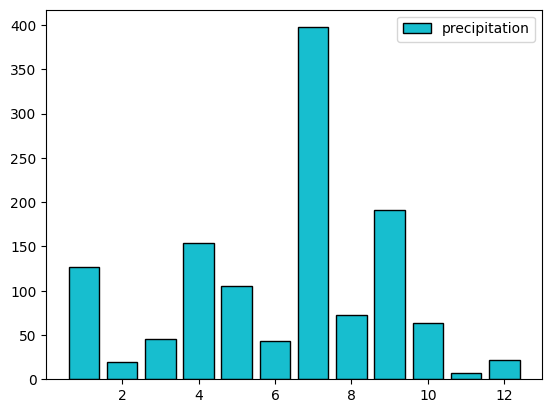

In [9]:
plt.bar(month, prec, color="tab:cyan", edgecolor="k", label="precipitation") # 棒の色と縁に異なる色を指定
plt.legend()

# 1つの図に複数のグラフを重ねてプロットする
`show`関数を呼び出す前に`plot`関数や`bar`関数を続けて呼べば，1枚の図にグラフを重ねられる．

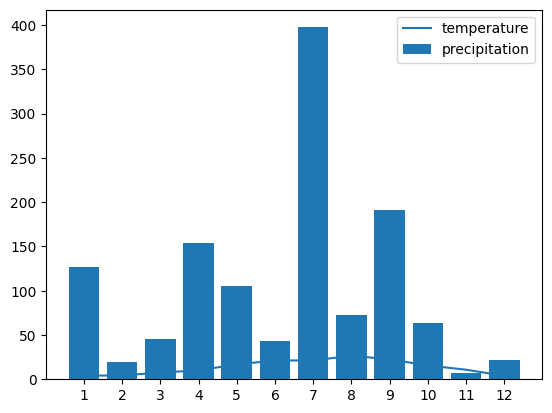

In [10]:
# 平均気温の折れ線グラフと降水量の棒グラフを1つにまとめて描画
plt.plot(month, temp, label="temperature") # 平均気温を折れ線グラフで描画
plt.bar(month, prec, label="precipitation") # 降水量を棒グラフで描画
plt.xticks(month) # x軸の目盛りを月単位にする
plt.legend() # 凡例の表示
plt.show()

これだと気温と降水量の区別がつかないので，それぞれの色を変えてみよう．

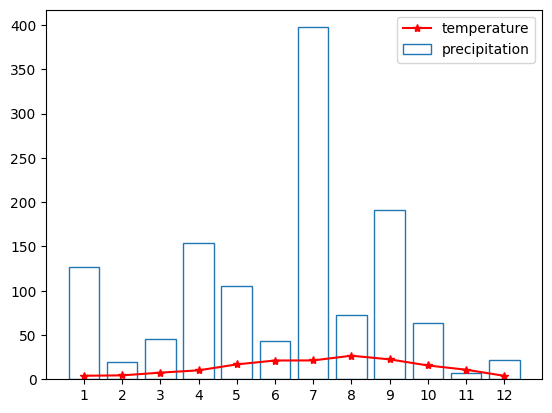

In [11]:
# 平均気温の折れ線グラフと降水量の棒グラフを1つにまとめて描画
plt.plot(month, temp, 'r-*', label="temperature") # 平均気温を折れ線グラフで描画
plt.bar(month, prec, color='none', edgecolor='C0', label="precipitation") # 降水量を棒グラフで描画（棒の色を抜いて，縁だけを描画）
plt.xticks(month) # x軸の目盛りを月単位にする
plt.legend() # 凡例の表示
plt.show()

# 1枚の図に２つのy軸をもつグラフをプロットする
上図は，気温（℃）と降水量（mm)という単位の異なるデータを１つのy軸に表示しているため，適切なグラフとは言い難い．このような場合は，図の左側と右側で単位の異なる２つのy軸を持つグラフを作成すればよい．

ただし，描画内容ごとに軸を変えるのはちょっと難しい．技術的に言うと，次のようなことをする必要がある．
1. [`pyplot.subplots`関数](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)を使って図([`pyplot.figure.Figure`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.figure.Figure.html))オブジェクトと1つ目のxy軸([`pyplot.axis.Axes`](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)オブジェクトを作り，変数`fig`, `ax1`に，それぞれ格納する．
2. `ax1`に対して[`Axes.twinx()`関数](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.twinx.html)を呼び出し，`ax1`と共通のx軸をもつ別のxy軸`ax2`を作成する．
3. `ax1`に対して`plot`関数を用いて気温をプロットし，`ax2`に対して`bar`関数を用いて降水量をプロットする．
4. `ax1`, `ax2`のそれぞれに対して[`Axes.get_legend_handles_labels`関数](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.get_legend_handles_labels.html)を呼び出して凡例のハンドラとラベルを作り，それぞれ，`h1, l1`および`h2, l2`に格納する．
5. `ax1`に対して[`Axes.legend`関数]()を呼び，ハンドラのリスト`h1+h2`とラベルのリスト`l1+l2`を引数に与えることで `ax1`軸と`ax2`軸の2つのラベルを1つの凡例にまとめる．

これを全部理解するのは大変なので「おまじない」が書かれてるんだと思って，次のセルを実行してみよう．

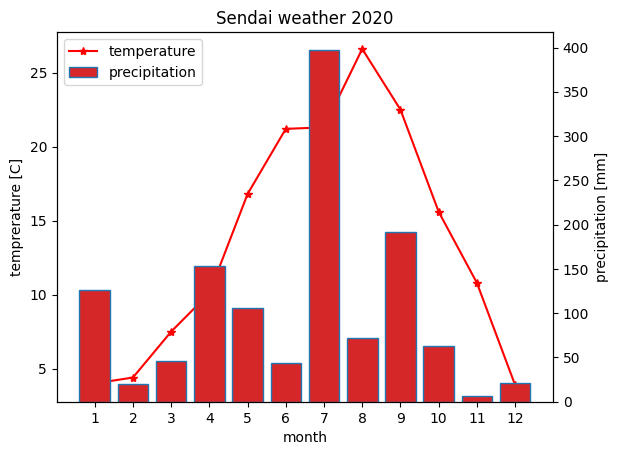

In [12]:
#
# 1枚の図に気温と降水量の2つのy軸を持つグラフをプロットする
#

fig, ax1 = plt.subplots() # ax1軸を作るおまじない
ax2 = ax1.twinx() # ax1とx軸を共有するax2軸を作るおまじない

# グラフのプロットと整形
ax1.plot(month, temp, 'r-*', label="temperature") # ax1軸に`plot`関数を用いて各月の平均気温をプロット
ax2.bar(month, prec, color='tab:red', edgecolor='C0', label="precipitation") # ax2軸に降水量を棒グラフでプロット
plt.xticks(month) # x軸の目盛りを月単位にする
plt.title('Sendai weather 2020') # グラフのタイトルを記載（課題で指示された年に合わせて修正して下さい）
ax1.set_xlabel("month") # x軸のラベル
ax1.set_ylabel("temprerature [C]") # y1軸のラベル
ax2.set_ylabel("precipitation [mm]") # y2軸のラベル

# 以下，凡例のためのおまじない
h1, l1 = ax1.get_legend_handles_labels() # ax1軸の凡例を抽出するおまじない
h2, l2 = ax2.get_legend_handles_labels() # ax2軸の凡例を抽出するおまじない
ax1.legend(h1+h2, l1+l2, loc='upper left') # ax1軸とax2軸の凡例を一緒に出力するおまじない
plt.show()

# グラフの保存
せっかく作成したグラフなのだから，保存しておこう．[savefig関数](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html)を使えば，作成したグラフを様々なファイル形式で保存できる．次のセルを実行すると，いま作ったグラフを`Sendai_weather.pdf` という PDF ファイルおよび `Sendai_weather.png` という PNG ファイルで保存できる．

1つのセルで**`savefig`関数と `show` 関数の両方を使う場合，`savefig`は `show`の前に呼ぶ必要がある．注意しよう．**

In [16]:
fig.savefig('Sendai_weather.pdf') # 現在の図を Sendai_weather.pdf というPDFファイルとして保存
fig.savefig('Sendai_weather.png') # 現在の図を Sendai_weather.png というPNGファイルとして保存

保存されたファイルは，Colaboratory のファイルビューワーから見ることができる．ファイルビューワーは，Colaboratoryの左側にあるアイコンから開くことができる．

![](https://i.imgur.com/VKGCj3z.png)

`Sendai_weather.pdf` を右クリックすればサブメニューが開き，ファイルをダウンロードできる．
![](https://i.imgur.com/AfJH5eN.png)


# まとめ

最後に，以上の操作を1つのセルにまとめたものを示しておく．

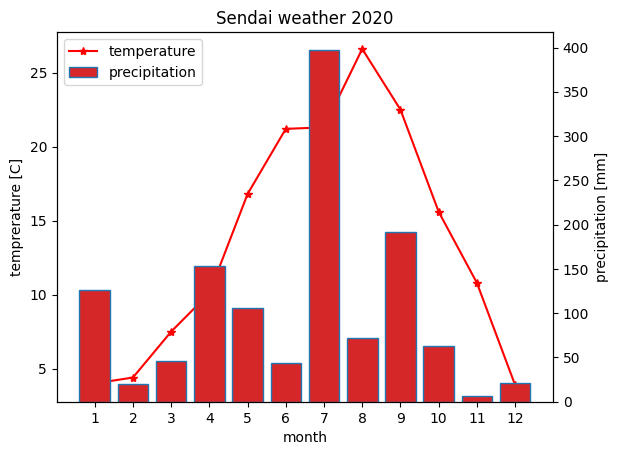

In [17]:
#
# 1枚の図に気温と降水量の2つのy軸を持つグラフをプロットする
#
from matplotlib import pyplot as plt # グラフ描画用のモジュールをインポート

#
# 月， 気温， 降水量データ (対象地域や対象年に応じて修正．気象庁サイトから直接データをDLする方法もある )
#
month = range(1,13) # 1から12までの整数列を作成
temp = [4.0, 4.4, 7.5, 10.1, 16.8, 21.2, 21.3, 26.6, 22.5, 15.6, 10.8, 3.9] # 気温
prec = [126.5, 19.5, 45.5, 153.5, 105.5, 43.5, 397.5, 72.5, 191.5, 63.0, 7.0, 21.5] # 降水量

# 描画領域と座標軸の作成
fig, ax1 = plt.subplots() # # subplots関数を使って描画領域オブジェクト fig と座標軸オブジェクト ax1 を作成するおまじない
ax2 = ax1.twinx() # ax1とx軸を共有するax2軸を作るおまじない

# グラフのプロット (グラフの色などの見栄えを変えるにはここを修正する)
# 平均気温のプロット
ax1.plot(month, temp, 'r-*', label="temperature") # ax1軸に`plot`関数を用いて各月の平均気温をプロット
# 降水量のプロット
ax2.bar(month, prec, color='tab:red', edgecolor='C0', label="precipitation") # ax2軸に降水量を棒グラフでプロット

# グラフの整形 (グラフを説明するラベルなどを変えるにはここを修正する)
plt.xticks(month) # x軸の目盛りを月単位にする
plt.title('Sendai weather 2020') # グラフのタイトルを記載（課題で指示された年に合わせて修正して下さい）
ax1.set_xlabel("month") # x軸のラベル
ax1.set_ylabel("temprerature [C]") # y1軸のラベル
ax2.set_ylabel("precipitation [mm]") # y2軸のラベル

# 以下，凡例のためのおまじない
h1, l1 = ax1.get_legend_handles_labels() # ax1軸の凡例を抽出するおまじない
h2, l2 = ax2.get_legend_handles_labels() # ax2軸の凡例を抽出するおまじない
ax1.legend(h1+h2, l1+l2, loc='upper left') # ax1軸とax2軸の凡例を一緒に出力するおまじない

# 作成した図の保存
fig.savefig('Sendai_weather.pdf') # 作成した図を Sendai_weather.pdf という PDF ファイルとして保存
plt.show() # plt.show() は fig.savefig()の後で呼ぶこと